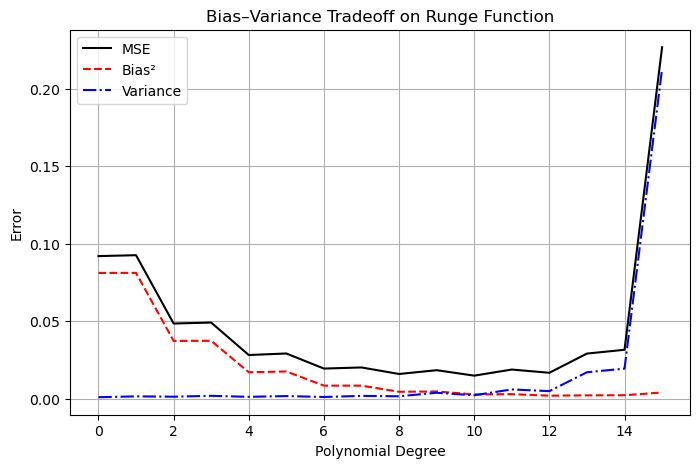

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- 1. Runge function ---
def runge(x):
    return 1 / (1 + 25 * x**2)

# --- 2. Data generation ---
np.random.seed(6114)
n = 100
sigma = 0.1
x_train = np.linspace(-1, 1, n)
y_train = runge(x_train) + np.random.normal(0, sigma, size=n)

x_test = np.linspace(-1, 1, 500)
y_true = runge(x_test)

# --- 3. Model complexity ---
degrees = range(0, 16)
B = 1000  # bootstrap samples

mse_list, bias2_list, var_list = [], [], []

for d in degrees:
    preds_boot = np.zeros((B, len(x_test)))

    for b in range(B):
        # Bootstrap resample
        idx = np.random.choice(len(x_train), len(x_train), replace=True)
        x_boot, y_boot = x_train[idx], y_train[idx]

        # Polynomial fit
        poly = PolynomialFeatures(d)
        X_boot = poly.fit_transform(x_boot.reshape(-1, 1))
        model = LinearRegression().fit(X_boot, y_boot)

        preds_boot[b, :] = model.predict(poly.transform(x_test.reshape(-1, 1)))

    # Bias-Variance decomposition
    pred_mean = np.mean(preds_boot, axis=0)
    bias2 = np.mean((pred_mean - y_true)**2)
    var = np.mean(np.var(preds_boot, axis=0))
    mse = bias2 + var + sigma**2

    bias2_list.append(bias2)
    var_list.append(var)
    mse_list.append(mse)

# --- 4. Plot ---
plt.figure(figsize=(8,5))
plt.plot(degrees, mse_list, 'k-', label='MSE')
plt.plot(degrees, bias2_list, 'r--', label='Bias²')
plt.plot(degrees, var_list, 'b-.', label='Variance')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias–Variance Tradeoff on Runge Function')
plt.legend()
plt.grid(True)
plt.show()
